In [1]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow
import os
from PIL import Image
#import cv2
import glob as gb
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import MaxPooling2D, Conv2D, MaxPool2D, Dense, Flatten, Input, BatchNormalization, Dropout
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [8]:
#data preprocessing
x_train = pd.read_csv("csvTrainImages 13440x1024.csv",header=None).to_numpy()
y_train = pd.read_csv("csvTrainLabel 13440x1.csv",header=None).to_numpy()-1

x_test = pd.read_csv("csvTestImages 3360x1024.csv",header=None).to_numpy()
y_test = pd.read_csv("csvTestLabel 3360x1.csv",header=None).to_numpy()-1

In [9]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
y_train

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [27],
       [27],
       [27]], dtype=int64)

In [13]:
x_train.shape

(13440, 1024)

In [15]:
x_test.shape

(3360, 1024)

In [16]:
cleaningData = SimpleImputer(missing_values=0,strategy="mean")

In [17]:
cleaningData.fit_transform(x_train,x_test)

array([[46.68571429, 20.5       , 43.66666667, ..., 47.15942029,
        36.74107143, 56.11210762],
       [46.68571429, 20.5       , 43.66666667, ..., 47.15942029,
        36.74107143, 56.11210762],
       [46.68571429, 20.5       , 43.66666667, ..., 47.15942029,
        36.74107143, 56.11210762],
       ...,
       [46.68571429, 20.5       , 43.66666667, ..., 47.15942029,
        36.74107143, 56.11210762],
       [46.68571429, 20.5       , 43.66666667, ..., 47.15942029,
        36.74107143, 56.11210762],
       [46.68571429, 20.5       , 43.66666667, ..., 47.15942029,
        36.74107143, 56.11210762]])

In [18]:
#-1 in reshape(-1) refers to an unknown dimension that the reshape() function calculates for you. 
    # used to give a new shape to an array without changing its data.
    #Here, this code make each image is 32*32
x_train = x_train.reshape(-1,32,32)
x_test = x_test.reshape(-1,32,32)

In [19]:
#Normlization
x_train = x_train/255
x_test = x_test/255

In [20]:
# for some reason the images are flipped and rotated
# so we transpose each image to be in the correct shape
x_train = np.array([image.T for image in x_train])
x_test = np.array([image.T for image in x_test])

In [24]:
x_train[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
x_test[0]

array([[0.        , 0.        , 0.        , ..., 0.05882353, 0.00784314,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11372549, 0.01568627,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
# shuffle
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

print(x_train.shape, x_test.shape)

(13440, 32, 32) (3360, 32, 32)


In [28]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [29]:
y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train_h.shape, y_test_h.shape)

(13440,) (3360,)
(13440, 28) (3360, 28)


In [30]:
#here, this make each image is 32*32 but vector
x_train = x_train.reshape(-1,32,32, 1)
x_test = x_test.reshape(-1,32,32, 1)

In [34]:
train_datagen=ImageDataGenerator(
    zoom_range=0.2, #the amount of zooming u need
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
    rotation_range=20, 
)
train_generator=train_datagen.flow(
    x_train ,y_train ,batch_size=64
)

test_datagen=ImageDataGenerator()
test_generator=test_datagen.flow(
    x_test ,y_test ,batch_size=64
)

In [35]:

earlystop = EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]
print(learning_rate_reduction.monitor)


val_loss


In [36]:
#random sample
arabic_chars =list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')
ra = np.random.randint(0, 13440, size=25)

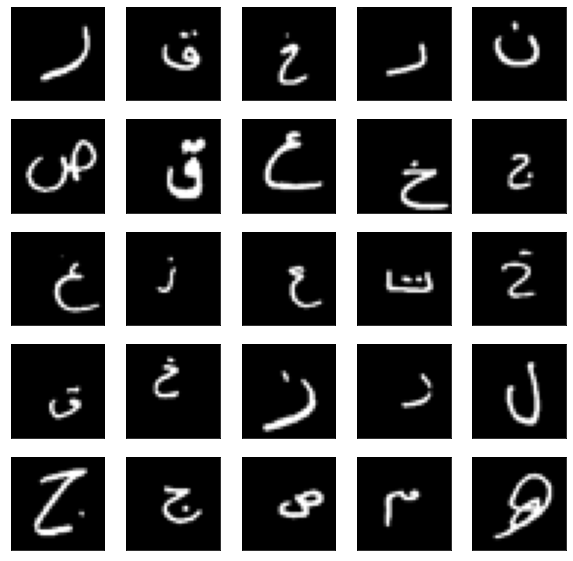

In [54]:
#plot random sample
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32),"gray")
    #plt.title(arabic_chars[int(y_train[ra[i]][1])], fontsize = 20)
plt.show()

In [55]:

#training data
model=Sequential() 

model.add(Conv2D(80,(5,5),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(1024,activation='relu', name='featurs'))
model.add(Dropout(0.3))
model.add(Dense(28, kernel_regularizer=l2(0.01) ,activation='softmax'))

model.compile(optimizer= 'adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [64]:
model.fit_generator(
    train_generator, 
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/10
210/210 [==============================] - 61s 289ms/step - loss: 0.6551 - accuracy: 0.8161 - val_loss: 0.3898 - val_accuracy: 0.9170
Epoch 2/10
210/210 [==============================] - 57s 272ms/step - loss: 0.5979 - accuracy: 0.8351 - val_loss: 0.3634 - val_accuracy: 0.9131
Epoch 3/10
210/210 [==============================] - 61s 292ms/step - loss: 0.5701 - accuracy: 0.8445 - val_loss: 0.3336 - val_accuracy: 0.9173
Epoch 4/10
210/210 [==============================] - 55s 260ms/step - loss: 0.5363 - accuracy: 0.8551 - val_loss: 0.3218 - val_accuracy: 0.9208
Epoch 5/10
210/210 [==============================] - 54s 258ms/step - loss: 0.5108 - accuracy: 0.8626 - val_loss: 0.2774 - val_accuracy: 0.9432
Epoch 6/10
210/210 [==============================] - 55s 263ms/step - loss: 0.4750 - accuracy: 0.8755 - val_loss: 0.2672 - val_accuracy: 0.9432
Epoch 7/10
210/210 [==============================] - 55s 263ms/step - loss: 0.4653 - accuracy: 0.8751 - val_loss: 0.3064 - val_ac

In [65]:
#val_loss, val_acc = model.evaluate(x_train, x_test)

<AxesSubplot:>

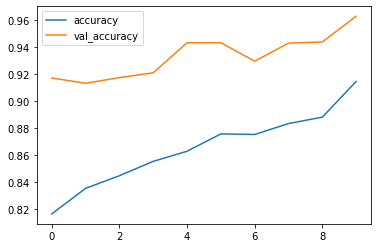

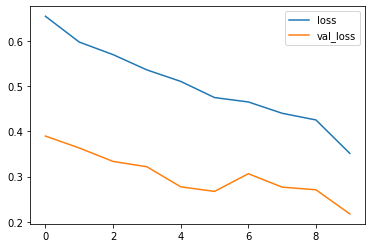

In [66]:
#some visualisations
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [ ]:
#from sklearn.metrics import confusion_matrix
#x_training, x_val, y_testing, y_val = train_test_split(x_train,x_test,random_state=2,test_size=0.2)

In [ ]:
#model prediction
#pred = model.predict(x_test)
#pred_classes = np.argmax(pred, axis=1)
#x_true = np.argmax(x_train, axis=1)
#Confusion_Matrix = confusion_matrix(x_true,pred_classes)